<a href="https://colab.research.google.com/github/Papa-Panda/sigma_counting/blob/main/Sigma_Counting_simulation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import time

In [ ]:
import math
def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class DataBase():
    def __init__(self,numRows, numColumns, realData = None):
        self.df = pd.DataFrame([])
        self.numColumns = numColumns
        self.numRows = numRows
        self.realData = realData

    def simulateDataBase(self):
        self.df = pd.DataFrame(np.random.randint(2,size=(self.numRows,self.numColumns)))
        return
    
    def transformRealData(self):
        self.df = pd.DataFrame(TransformDataToDatabase(self.realData))

In [ ]:
db = DataBase(100000, 20)
db.simulateDataBase()

In [ ]:
class Queries():
    def __init__(self,numQueries, querySize):
        self.queries = [ [0] * querySize for n in range(numQueries)]
        self.numQueries = numQueries
        self.querySize = querySize
        self.choices = [0, 1, np.nan]
        
    def simulateQueries(self):
#         self.queries = [ [ self.choices[n] for n in list( np.random.randint(3, size = self.querySize ))]\
#                         for n in range(self.numQueries)]
        self.queries = [ [ self.choices[n] for n in list( np.random.choice(3, size = self.querySize,p=[0.1, 0.1, 0.8] ))]\
                        for n in range(self.numQueries)]


In [ ]:
qList = Queries(100000,db.numColumns)
qList.simulateQueries()

In [ ]:
def QueryPopSize(query, db):
    criteria = [True] * db.df.shape[0]
    for i in range(len(query)):
        if query[i] in [0,1]:
            criteria &= (db.df[i] == query[i])
        # else no action, which means select both 0 and 1
    return len( db.df[criteria] )

In [ ]:
for i in range(10, 15):
    query = qList.queries[i]
    print( i, QueryPopSize(query, db) )

(10, 3211)
(11, 3127)
(12, 24775)
(13, 100000)
(14, 12670)


In [ ]:
def queryToClusterRep(query):
    res = [0] * len(query)
    for i in range(len(query)):
        if query[i] in [0,1]:
            res[i] = 1
    return res

In [ ]:
qListRep = [ queryToClusterRep(query) for query in qList.queries]

# test data

In [ ]:
np.sum( np.isnan(qList.queries[1] )  )

11

In [ ]:
np.random.choice(3, size = (10, 10), p=[0.2, 0.2, 0.6])

array([[2, 2, 1, 0, 0, 0, 2, 0, 1, 1],
       [0, 2, 0, 0, 2, 2, 2, 2, 2, 2],
       [2, 2, 1, 2, 2, 2, 2, 2, 2, 2],
       [1, 2, 2, 1, 2, 2, 2, 0, 2, 2],
       [2, 0, 0, 2, 2, 2, 2, 2, 2, 0],
       [2, 2, 2, 1, 2, 2, 0, 1, 2, 1],
       [1, 2, 2, 2, 2, 0, 1, 2, 2, 2],
       [0, 2, 2, 2, 2, 0, 1, 2, 2, 2],
       [1, 2, 1, 2, 0, 1, 2, 2, 0, 2],
       [0, 2, 1, 0, 2, 2, 1, 1, 0, 0]])

## use kmeans to cluster

In [ ]:
from sklearn.cluster import KMeans

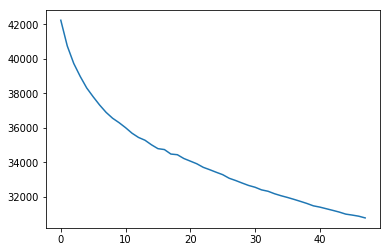

In [ ]:
res = []
for n_clusters in (range(2,50)):
    kmeans = KMeans(n_clusters = n_clusters, algorithm = 'full', max_iter = 30000, init = 'random').fit(np.array(qListRep))
#     print( set(kmeans.labels_) )
    # print(np.sum(kmeans.labels_))
    # print(kmeans.labels_.shape)
    # print(kmeans.labels_)
    # print(kmeans.cluster_centers_)
    res.append(kmeans.inertia_)
    
plt.plot(res)

In [ ]:
kmeans = KMeans(n_clusters = 10, algorithm = 'full', max_iter = 30000, init = 'random').fit(np.array(qListRep))


In [ ]:
print( set(kmeans.labels_) )
print(np.mean(kmeans.labels_))
print(kmeans.labels_.shape)
print(kmeans.labels_)
# print(kmeans.cluster_centers_)

In [ ]:
np.sum( kmeans.labels_ == 0 )

## find distribution

In [ ]:
print( len(qListRep), len( qListRep[0] ) )

(100000, 20)


(array([7.0720e+03, 1.3803e+04, 4.2237e+04, 1.7425e+04, 1.0868e+04,
        7.6320e+03, 7.1800e+02, 2.4000e+02, 4.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

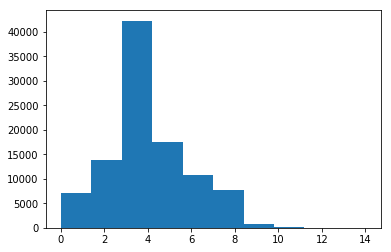

In [ ]:
plt.hist([ np.sum(l) for l in qListRep])

In [ ]:
distribution = (  [7.0720e+03, 1.3803e+04, 4.2237e+04, 1.7425e+04, 1.0868e+04,
        7.6320e+03, 7.1800e+02, 2.4000e+02, 4.0000e+00, 1.0000e+00] )

# simulation results

### Theorem 1

In [ ]:
#### partial order

### Theorem 2

measure errors given the same budget

### simalation data

In [ ]:
#### sigma counting threshold

In [ ]:
Omega = 2**20
print( 'Sigma Counting wins when Q > ', Omega**1.5 )

('Sigma Counting wins when Q > ', 1073741824.0)


In [ ]:
# case 1 
# when query
query = qList[0]
np.sum(queryToClusterRep(query))

AttributeError: Queries instance has no attribute '__getitem__'

In [ ]:
#### sigma counting theoretical version

In [ ]:
budget = 10000
# number of queries = Q = 100000
Q = 10000
epsilon = budget/Q
# noise in baseline:
# error is theoretical value
error_baseline =  (1/epsilon)**2
print('error_baseline', error_baseline)

# # sigma coutning method:
# for all the queries:
# Consider sigma counting for n = 3
n = 3
Omega = 2**db.numColumns
epsilon_prime = budget/Omega
def error(query):
    if 
    return 2**( n - np.sum(queryToClusterRep(query)) ) * (1/epsilon_prime)**2

error = 0
for q in qList.queries:
    if np.sum(queryToClusterRep(query)) <= 3:
        error += error(q)
print( error/len(qList))

SyntaxError: invalid syntax (<ipython-input-332-5689d307de3b>, line 17)

In [ ]:
#### sigma counting application version

### theorem 3

In [ ]:
n = 3
# n can be 1 and 2, too
# pick those queries which has size <= n 
# the number of such queries is
print( 'number of queries', np.sum(distribution[:n]))
# Omega_k < 2**n
# \sum Omega_k * \sqrt( max(Omega_k) ) equals to following
print( '> this threshold, sigma counting wins', round(2**n * binom(20,n) * math.sqrt(2**n))  )
# as we see in this example, we have enough data

('number of queries', 63112.0)
('> this threshold, sigma counting wins', 25795.0)


In [ ]:
#### idea extension: as long as we can apply this optimization to pre-selected (simple) queries, 
#### sigma counting can alway wins

In [ ]:
# think about this further
## when n = 3
n = 3
len(qListRep)
qListRep_underN = [ l for l in qListRep if np.sum(l) <= n ]
sample = [1]* 3 + [0] * 17
print ( 'Onaveerage, there are this number in each bucket', len( qListRep_underN )/binom(20,n))
len( [ l for l in qListRep_underN if l == sample] )

('Onaveerage, there are this number in each bucket', 36)


9

Text(0.5,1,'Comparison: number of queres vs sigma thrshold')

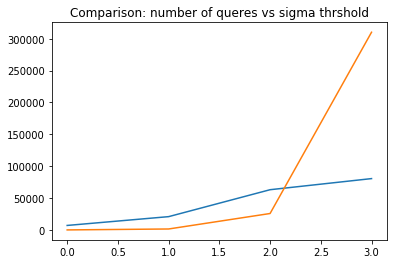

In [ ]:
num_queries, sigma_threshold = [], []
for n in range(1, 5):
    num_queries.append( np.sum(distribution[:n]) )
    sigma_threshold.append( round(2**n * binom(20,n) * math.sqrt(2**n)) )
    
plt.plot(num_queries, label = 'num queries')
plt.plot(sigma_threshold, label = 'sigma threshold')
plt.title('Comparison: number of queres vs sigma thrshold')

### Theorem 4

In [ ]:
#### conclusion is similar to above 
#### notice Q * (1-p) is just the selected number of queries

# real data

In [ ]:
RealData = pd.read_csv('ColabNotebooks/adult.csv')

IOError: ignored

In [ ]:
s = 'fnlwgt'
print(s)
sorted( list( set( [ int(n/100000) for n in RealData[s].unique() ] ) ) )

fnlwgt


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
[ n for n in RealData[s].unique() if n != '?' ]

['Private',
 'State-gov',
 'Federal-gov',
 'Self-emp-not-inc',
 'Self-emp-inc',
 'Local-gov',
 'Without-pay',
 'Never-worked']

In [ ]:
def transformToIndex(s):
    if s == 'age':
        return sorted( list( set( [ int(n/10) for n in RealData[s].unique() ] ) ) ), 10
    elif s == 'fnlwgt':
        return sorted( list( set( [ int(n/100000) for n in RealData[s].unique() ] ) ) ), 100000
    elif s == 'capital.gain':
        return sorted( list( set( [ int(n/10000) for n in RealData[s].unique() ] ) ) ), 10000
    elif s == 'capital.loss':
        return sorted( list( set( [ int(n/1000) for n in RealData[s].unique() ] ) ) ), 1000
    elif s == 'hours.per.week':
        return sorted( list( set( [ int(n/10) for n in RealData[s].unique() ] ) ) ), 10
    else: 
        return sorted( list( RealData[s].unique() )), 0

In [ ]:
2**(int( np.log( len( IndexList ))/np.log(2))) - 1

8

In [ ]:
def TransformEntryToVector(entry):
    res = ''
    columnList = list( RealData.columns)
    columnList.remove('education')
    for column in columnList:
#         print(column)
        IndexList, notional = transformToIndex(column)
        max_index = 2**(int( np.log( len( IndexList ))/np.log(2))) - 1
        if notional > 0 :
#             print(IndexList)
#             print(notional)
#             print()
#             print(IndexList.index( RealData.iloc[0][column]/notional))
            index = min(max_index, IndexList.index( entry[column]/notional) )
        else:
            index = min( max_index, IndexList.index( entry[column] ) )
        res += ('{0:0='+str(max_index)+'b}').format(index)
    return res

In [ ]:
for i in range(10, 200):
    res = TransformEntryToVector( RealData.iloc[0])
    if len(res) != 98:
        print(i, len(res))

In [ ]:
def TransformDataToDatabase(RealData):
    res = []
    for i in range(len(RealData)):
        entry = TransformEntryToVector(RealData.iloc[i])
        entry = [int(s) for s in entry]
        res.append( entry )
    return pd.DataFrame(res)

In [ ]:
begin = time.time()
tmp = TransformDataToDatabase(RealData)
print(round(time.time() - begin))

715.0
